In [276]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy

In [277]:
base = pd.read_csv('Walmart.csv')

In [278]:
base['Order Date'] = pd.to_datetime(base['Order Date'],format ='%d-%m-%Y')
base['Ship Date'] = pd.to_datetime(base['Ship Date'],format ='%d-%m-%Y')

base['Ano'] = base['Order Date'].dt.year
base['Mes'] = base['Order Date'].dt.month

base['Order Date'] = base['Order Date'].dt.strftime('%Y%m%d')
base['Ship Date'] = base['Ship Date'].dt.strftime('%Y%m%d')


In [279]:
base.loc[base['Product Name'].str.contains('P710e'), 'Product Name'] = 'Logitech P710e Mobile Speakerphone'

In [280]:
base

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Ano,Mes
0,CA-2013-138688,20130613,20130617,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6
1,CA-2011-115812,20110609,20110614,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6
2,CA-2011-115812,20110609,20110614,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011,6
3,CA-2011-115812,20110609,20110614,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6
4,CA-2011-115812,20110609,20110614,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,20130930,20131004,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,2013,9
3199,CA-2014-121258,20140227,20140304,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,2014,2
3200,CA-2014-121258,20140227,20140304,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,2014,2
3201,CA-2014-121258,20140227,20140304,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,2014,2


In [281]:
# Qual foi o total de vendas no período do conjunto de dados? ------------------------------------------------

base['Order ID'].value_counts().sum() # Quantidade de vendas

3203

In [282]:
base['Sales'].sum() # Valor total das vendas

725457.9299999999

In [283]:
# Quais são os produtos mais vendidos em termos de quantidade e lucro? ------------------------------------------------

qtdluc = base.groupby('Product Name')[['Profit','Quantity']].sum().sort_values('Profit',ascending=False).head(11)
qtdluc = qtdluc.drop('Logitech P710e Mobile Speakerphone')


qtdluc

,Profit,Quantity
Product Name,,
Canon imageCLASS 2200 Advanced Copier,6719.98,4.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,3050.38,8.0
Canon PC1060 Personal Laser Copier,2267.97,12.0
Hewlett Packard LaserJet 3310 Copier,2183.96,13.0
Logitech Z-906 Speaker sys - home theater - 5.1-CH,1715.95,13.0
Plantronics Savi W720 Multi-Device Wireless Headset System,1670.92,9.0
Ibico EPK-21 Electric Binding System,1644.29,3.0
Canon PC940 Copier,1480.47,7.0
Canon Image Class D660 Copier,1379.98,5.0


In [284]:
# Qual é o valor médio de vendas e lucro por pedido? ------------------------------------------------

vndluc = base.groupby('Product Name')[['Profit','Sales']].mean().sort_values('Profit',ascending=False).head(11)

vndluc

,Profit,Sales
Product Name,,
Canon imageCLASS 2200 Advanced Copier,6719.980000,13999.960000
Ibico EPK-21 Electric Binding System,1644.290000,4535.980000
Canon PC940 Copier,1480.470000,3149.930000
Canon Image Class D660 Copier,1379.980000,2999.950000
GBC DocuBind P400 Electric Binding System,1061.570000,3266.380000
Canon Imageclass D680 Copier / Fax,1049.990000,3359.950000
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,1016.793333,2711.443333
Canon PC1060 Personal Laser Copier,755.990000,2239.966667
Hewlett Packard LaserJet 3310 Copier,727.986667,2079.963333


In [285]:
# Lucro ordenado do menor valor ( valores negativos ) 

base.groupby('Product Name')[['Profit','Sales']].mean().sort_values('Profit',ascending=False).tail(11)

,Profit,Sales
Product Name,,
"Hon Metal Bookcases, Black",-191.6500,127.7600
GBC DocuBind 300 Electric Binding Machine,-199.8700,894.1650
O'Sullivan 4-Shelf Bookcase in Odessa Pine,-200.5275,452.1625
"Chromcraft 48"" x 96"" Racetrack Double Pedestal Table",-218.0350,657.3100
Sauder Barrister Bookcases,-247.8000,145.7600
Okidata B401 Printer,-251.9900,179.9900
Martin Yale Chadless Opener Electric Letter Opener,-299.8100,1332.5000
Hon 4-Shelf Metal Bookcases,-363.5300,242.3500
Panasonic KX MC6040 Color Laser Multifunction Printer,-386.9600,269.9700


In [286]:
# Média de valor vendido

base['Sales'].mean()

226.49326568841644

In [287]:
# Média de lucro por pedido

base['Profit'].mean()

33.8491383078364

<AxesSubplot:>

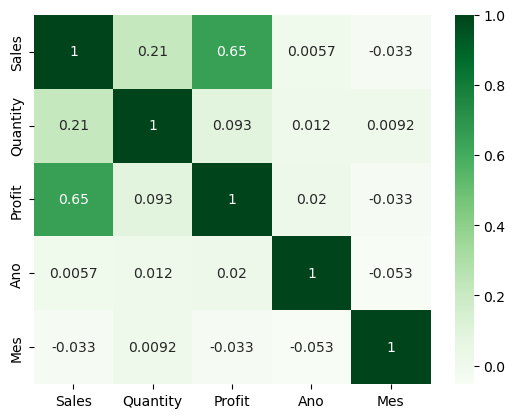

In [288]:
plt.figure()
sns.heatmap(base.corr(),annot=True,cmap ='Greens')

In [289]:
# Quais são os estados que geraram mais vendas e lucros? ------------------------------------------------

base['State'].value_counts() # California foi o estado que mais esteve presente

California    2001
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      37
Idaho           21
Montana         15
Wyoming          1
Name: State, dtype: int64

In [290]:
aux = copy.deepcopy(base)
aux = aux.sort_values('Sales', ascending = False)


In [291]:
stvdlc = aux.groupby('State')['Profit'].mean()
# mask = stvdlc >= 0
# stvdlc = stvdlc[mask]
stvdlc


State
Arizona       -15.302991
California     38.171714
Colorado      -35.867363
Idaho          39.368095
Montana       122.221333
Nevada         85.045128
New Mexico     31.273784
Oregon         -9.600645
Utah           48.048302
Washington     66.013241
Wyoming       100.200000
Name: Profit, dtype: float64

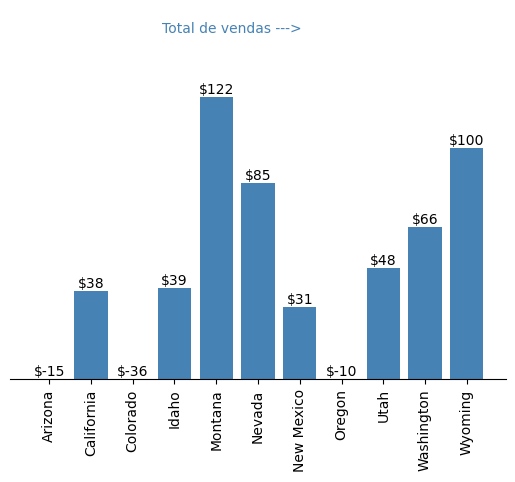

In [292]:
x = stvdlc.index
y = stvdlc.values

fig, ax = plt.subplots()

ax.bar(x, y, label = 'Lucro',color='steelblue')
ax.tick_params('x',labelrotation = 90)
ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_ylim(0,160)


for p in np.arange(0,len(stvdlc)):
    a=1.5
    if stvdlc[p] <0:
        plt.annotate(f'${y[p]:.0f}',(x[p],1.5),ha='center',color='black')
        
    else:
        plt.annotate(f'${y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')

plt.annotate('Total de vendas --->',(2.7,150),color='steelblue')

plt.show()

In [293]:
# Qual é a taxa de crescimento das vendas ao longo do tempo?

base = base.sort_values('Order Date')
base['Order Date'] = base['Order Date'].astype(int)
base['Ship Date'] = base['Ship Date'].astype(int)

aux = base.groupby('Ano')['Sales'].sum()

In [294]:
base['Ano'].value_counts()

2014    1099
2013     801
2011     661
2012     642
Name: Ano, dtype: int64

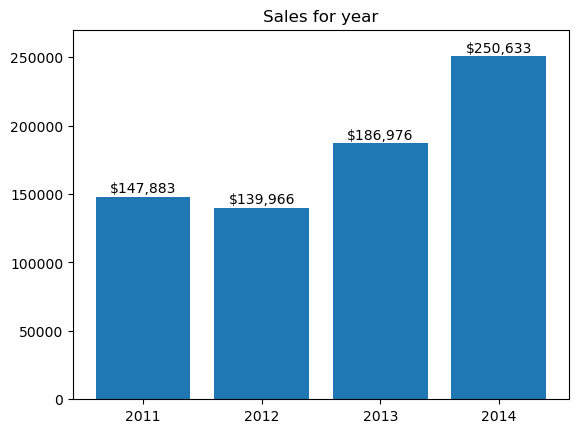

In [295]:
x = aux.index
y = aux.values.astype(float)

fig, ax = plt.subplots()
ax.xaxis.set_ticks([2011,2012,2013,2014])
ax.set_ylim(0,270000)
ax.set_title('Sales for year')

for p in np.arange(0,len(aux)):
    a=3000
    plt.annotate(f'${y[p]:,.0f}',(x[p],y[p]+a),ha='center',color='black')

ax.bar(x, y)

plt.show()

In [296]:
# Qual é a relação entre a quantidade vendida e o lucro?

base = base.sort_values('Order Date')
base['Profit'].corr(base['Sales'])

0.6474772917300367

<AxesSubplot:>

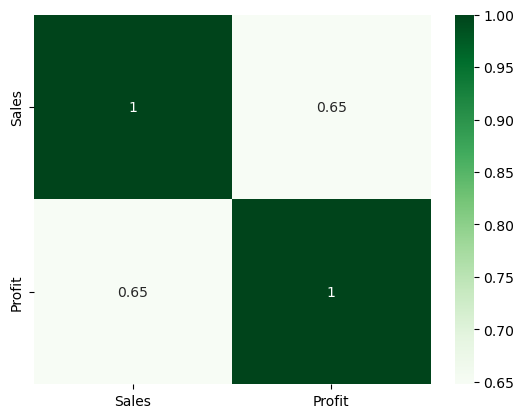

In [297]:
plt.figure()
sns.heatmap(base[['Sales','Profit']].corr(),annot=True,cmap ='Greens')

In [298]:
# Qual é a categoria de produto mais vendida em termos de quantidade e lucro?

base.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)

,Sales,Profit
Category,,
Chairs,101781.36,4027.62
Phones,98684.39,9111.06
Tables,84754.60,1482.54
Storage,70532.84,8645.49
Accessories,61114.10,16484.62
Binders,55961.11,16096.78
Copiers,49749.23,19327.25
Machines,42444.14,-618.95
Bookcases,36004.18,-1646.50


In [299]:
base.groupby('Category')[['Sales','Profit']].sum().sort_values('Profit',ascending=False)

# Acessorios e Phones são os mais bem classificados

,Sales,Profit
Category,,
Copiers,49749.23,19327.25
Accessories,61114.10,16484.62
Binders,55961.11,16096.78
Paper,26663.73,12119.10
Phones,98684.39,9111.06
Storage,70532.84,8645.49
Appliances,30236.32,8261.29
Furnishings,30072.73,7641.26
Chairs,101781.36,4027.62


In [300]:
# Quais são os principais clientes em termos de vendas e lucro?

base.groupby('Customer Name')[['Sales','Profit']].sum().sort_values('Profit',ascending=False)

,Sales,Profit
Customer Name,,
Raymond Buch,14345.28,6807.08
Jane Waco,7391.53,2073.29
Fred Hopkins,5054.48,1991.91
Dennis Pardue,4941.68,1789.69
Robert Marley,4881.13,1598.51
...,...,...
Laurel Beltran,2836.04,-471.29
Resi Pölking,1519.43,-491.79
Jim Radford,604.10,-785.16


In [301]:
# Pessoas que só compraram uma unica vez

aux = base.drop_duplicates(subset=['Customer Name'],keep=False)

aux


,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Ano,Mes
1707,CA-2011-130813,20110107,20110109,Lycoris Saunders,United States,Los Angeles,California,Paper,Xerox 225,19.44,3.0,9.33,2011,1
2757,CA-2011-104808,20110205,20110209,Mark Haberlin,United States,Escondido,California,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",17.25,2.0,6.04,2011,2
2733,CA-2011-100881,20110328,20110401,Daniel Raglin,United States,Albuquerque,New Mexico,Phones,AT&T TR1909W,302.38,3.0,22.68,2011,3
482,CA-2011-105172,20110404,20110409,Paul Knutson,United States,San Francisco,California,Labels,Avery 518,18.90,6.0,9.07,2011,4
9,CA-2011-167164,20110513,20110515,Alejandro Grove,United States,West Jordan,Utah,Storage,Fellowes Super Stor/Drawer,55.50,2.0,9.99,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,CA-2014-136308,20141117,20141117,Mitch Willingham,United States,San Francisco,California,Machines,Bady BDG101FRU Card Printer,1919.98,3.0,216.00,2014,11
593,CA-2014-121538,20141129,20141202,Rick Hansen,United States,Denver,Colorado,Paper,"Eaton Premium Continuous-Feed Paper, 25% Cotto...",88.77,2.0,31.07,2014,11
2234,US-2014-149006,20141207,20141209,Brad Norvell,United States,Brentwood,California,Storage,Staples,10.68,1.0,2.88,2014,12
66,CA-2014-108329,20141210,20141215,Laurel Elliston,United States,Whittier,California,Phones,Nortel Business Series Terminal T7208 Digital ...,444.77,4.0,44.48,2014,12


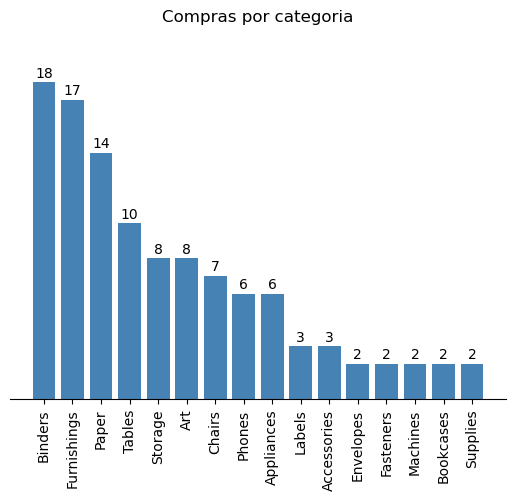

In [302]:
cat = aux['Category'].value_counts()

x = cat.index
y = cat.values

fig, ax = plt.subplots()

ax.bar(x, y, label = 'Lucro',color='steelblue')
ax.tick_params('x',labelrotation = 90)
ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_ylim(0,21)
ax.set_title('Compras por categoria')


for p in np.arange(0,len(cat)):
    a=0.3
    plt.annotate(f'{y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')




plt.show()

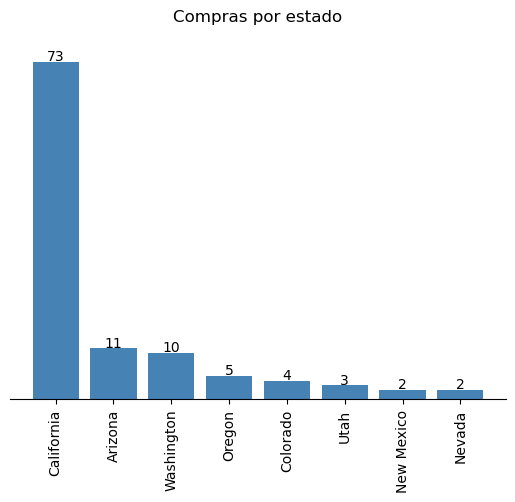

In [303]:
stat = aux['State'].value_counts()

x = stat.index
y = stat.values

fig, ax = plt.subplots()

ax.bar(x, y, label = 'Lucro',color='steelblue')
ax.tick_params('x',labelrotation = 90)
ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_ylim(0,80)
ax.set_title('Compras por estado')


for p in np.arange(0,len(stat)):
    a=0.3
    plt.annotate(f'{y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')




plt.show()

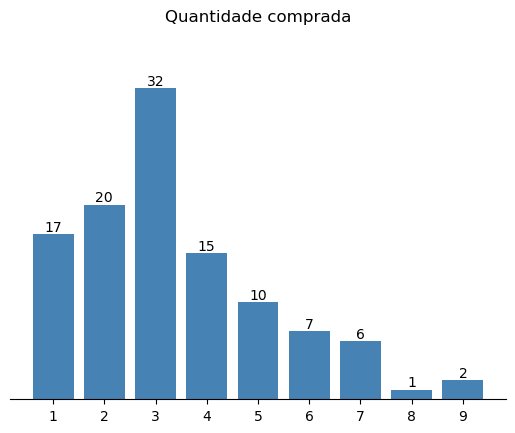

In [304]:
qtd = aux['Quantity'].value_counts()

x = qtd.index.astype(int)
y = qtd.values

fig, ax = plt.subplots()

ax.bar(x, y, label = 'Lucro',color='steelblue')
# ax.tick_params('x',labelrotation = 90)
# ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_ylim(0,38)
ax.xaxis.set_ticks([3, 2, 1, 4, 5, 6, 7, 9, 8])
ax.set_title('Quantidade comprada')

for p in np.arange(0,len(qtd)):
    a=0.3
    plt.annotate(f'{y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')




plt.show()

In [305]:
# Pessoas que compraram mais de uma vez

aux = base[base.duplicated(subset='Customer Name',keep=False)]

aux

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,Ano,Mes
1580,CA-2011-157147,20110114,20110119,Brian Dahlen,United States,San Francisco,California,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",334.00,3.0,3.93,2011,1
1581,CA-2011-157147,20110114,20110119,Brian Dahlen,United States,San Francisco,California,Art,4009 Highlighters by Sanford,19.90,5.0,6.57,2011,1
1579,CA-2011-157147,20110114,20110119,Brian Dahlen,United States,San Francisco,California,Storage,Tennsco 6- and 18-Compartment Lockers,1325.85,5.0,238.65,2011,1
1719,CA-2011-123477,20110119,20110122,David Wiener,United States,Springfield,Oregon,Appliances,Fellowes Mighty 8 Compact Surge Protector,64.86,4.0,6.49,2011,1
1761,CA-2011-146591,20110120,20110121,Toby Swindell,United States,Scottsdale,Arizona,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",32.34,10.0,-23.72,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,CA-2014-118885,20141230,20150103,James Galang,United States,Los Angeles,California,Phones,Adtran 1202752G1,302.38,3.0,22.68,2014,12
578,CA-2014-118885,20141230,20150103,James Galang,United States,Los Angeles,California,Chairs,"Global High-Back Leather Tilter, Burgundy",393.57,4.0,-44.28,2014,12
389,CA-2014-115427,20141231,20150104,Erica Bern,United States,Fairfield,California,Binders,GBC Binding covers,20.72,2.0,6.48,2014,12
388,CA-2014-115427,20141231,20150104,Erica Bern,United States,Fairfield,California,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2.0,4.52,2014,12


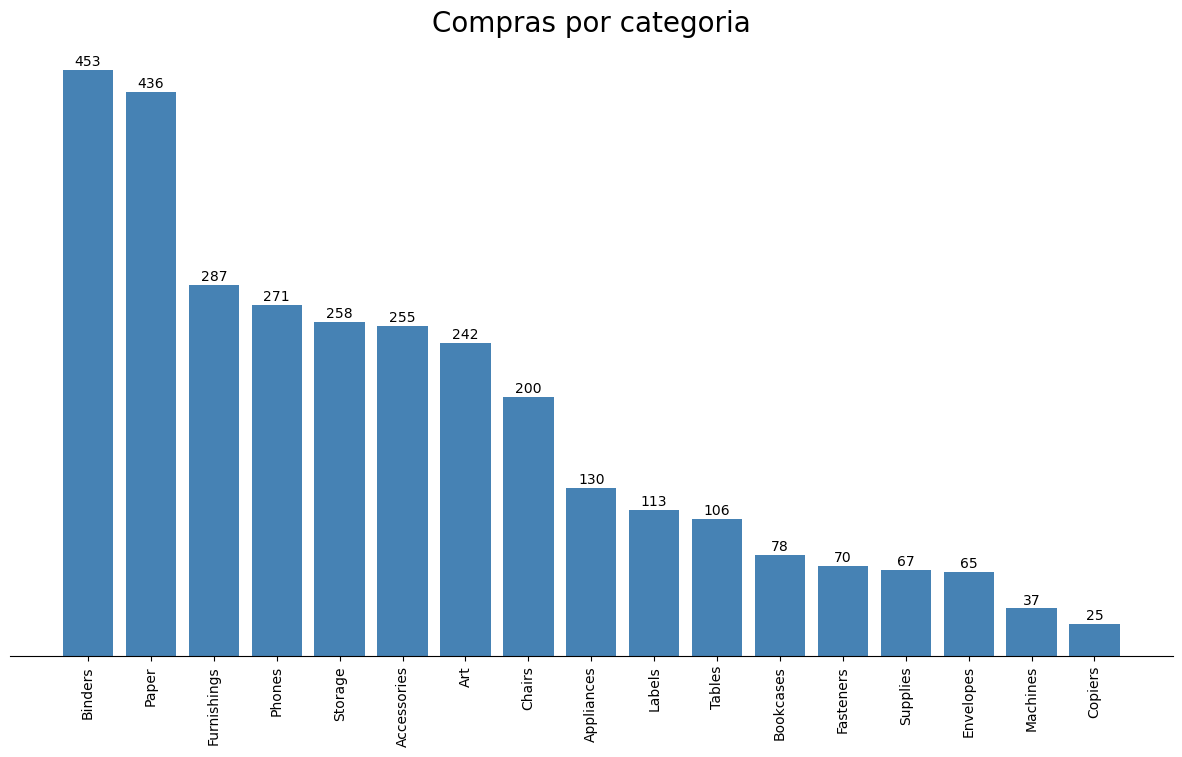

In [306]:
cat = aux['Category'].value_counts()

x = cat.index
y = cat.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x, y, label = 'Lucro',color='steelblue')
ax.tick_params('x',labelrotation = 90)
ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
# ax.set_ylim(0,21)
# ax.set_xlabel('Eixo X',fontsize = 24)
ax.set_title('Compras por categoria',fontsize = 20)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=114)


for p in np.arange(0,len(cat)):
    a=3
    plt.annotate(f'{y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')




plt.show()

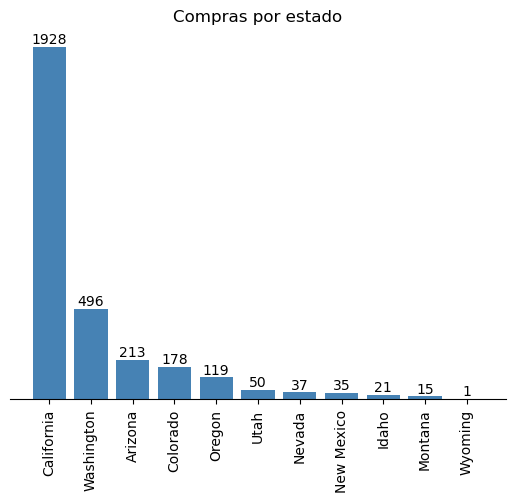

In [307]:
stat = aux['State'].value_counts()

x = stat.index
y = stat.values

fig, ax = plt.subplots()

ax.bar(x, y, label = 'Lucro',color='steelblue')
ax.tick_params('x',labelrotation = 90)
ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
# ax.set_ylim(0,80)
ax.set_title('Compras por estado')


for p in np.arange(0,len(stat)):
    a=20
    plt.annotate(f'{y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')




plt.show()

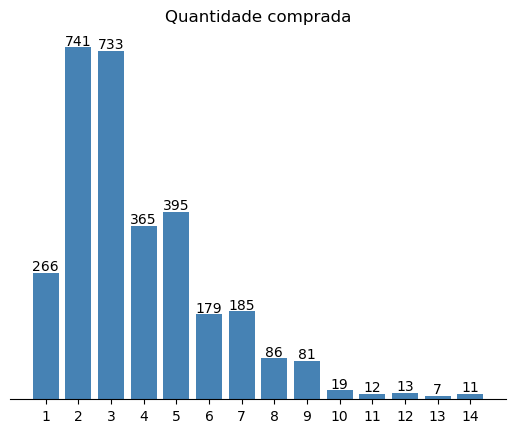

In [308]:
qtd = aux['Quantity'].value_counts()

x = qtd.index.astype(int)
y = qtd.values

fig, ax = plt.subplots()

ax.bar(x, y, label = 'Lucro',color='steelblue')
# ax.tick_params('x',labelrotation = 90)
# ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
# ax.set_ylim(0,38)
ax.xaxis.set_ticks([2, 3, 5, 4, 1, 7, 6, 8, 9, 10, 12, 11, 14, 13])
ax.set_title('Quantidade comprada')

for p in np.arange(0,len(qtd)):
    a=5
    plt.annotate(f'{y[p]:.0f}',(x[p],y[p]+a),ha='center',color='black')




plt.show()

In [309]:
# Existe relação da data de entrega e a quantidade de vendas? Não!
base['Delivery'] = base['Ship Date'] - base['Order Date']

In [310]:
aux = base.groupby('Customer Name')[['Sales','Profit','Delivery']].mean().sort_values('Sales',ascending=False)

In [311]:
aux = aux.reset_index()
aux = aux.sort_values('Customer Name')
aux2 = base['Customer Name'].value_counts().reset_index().sort_values('index')
aux2 = aux2.drop('index', axis=1)
aux['Qtd de compras'] = aux2.values

In [312]:
aux.sort_values('Qtd de compras',ascending=False)

,Customer Name,Sales,Profit,Delivery,Qtd de compras
224,William Brown,230.127500,34.387083,14.250000,24
424,Arthur Prichep,103.071304,16.492174,20.043478,23
172,Rick Wilson,281.466842,53.605789,8.210526,19
418,Greg Guthrie,105.552353,7.197059,40.882353,17
322,Zuschuss Carroll,165.068125,21.631875,17.437500,16
...,...,...,...,...,...
209,Joni Blumstein,250.260000,72.580000,2.000000,1
585,Chris McAfee,39.810000,3.980000,74.000000,1
118,Sarah Bern,354.900000,17.750000,4.000000,1
684,Sara Luxemburg,2.220000,0.560000,2.000000,1


In [313]:
# Comparando vendas por mês

soma_mes = base.groupby(["Mes","Ano"])["Sales"].sum()

In [314]:
soma_mes = soma_mes.reset_index()

In [315]:
x = soma_mes[soma_mes['Ano']==2011]

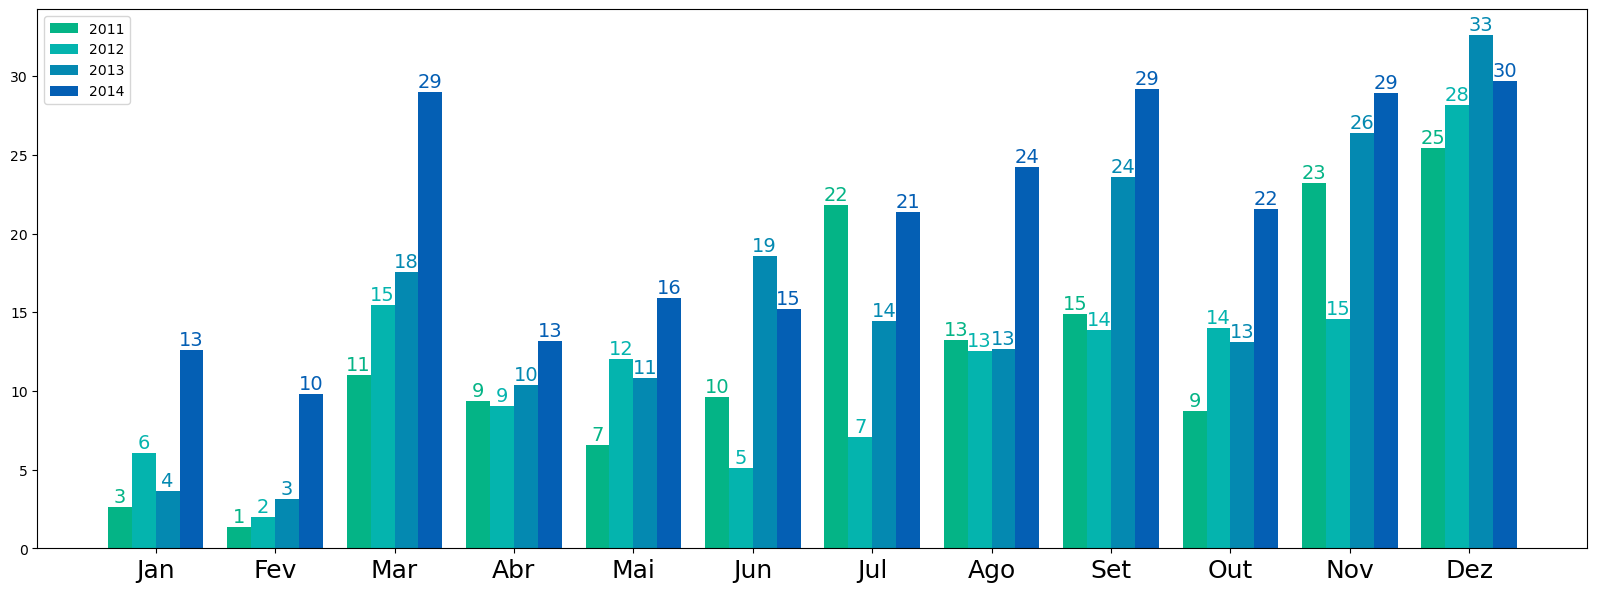

In [316]:
fig, ax =plt.subplots(figsize = (20,7))

wid=0.2

ax.bar(soma_mes[soma_mes['Ano']==2011].Mes.values-wid-wid/2, 
       soma_mes[soma_mes['Ano']==2011].Sales.values/1000,
       width = wid,
       label = 2011,
       color = '#04B486'
      )

ax.bar(soma_mes[soma_mes['Ano']==2012].Mes.values-wid/2,
       soma_mes[soma_mes['Ano']==2012].Sales.values/1000,
       width = wid,
       label = 2012,
       color = '#04B4AE'
      )

ax.bar(soma_mes[soma_mes['Ano']==2013].Mes.values+wid/2,
       soma_mes[soma_mes['Ano']==2013].Sales.values/1000,
       width = wid,
       label = 2013,
       color = '#0489B1'
      )
ax.bar(soma_mes[soma_mes['Ano']==2014].Mes.values+wid+wid/2,
       soma_mes[soma_mes['Ano']==2014].Sales.values/1000,
       width = wid,
       label = 2014,
       color = '#045FB4'
      )

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no meu eixo

x1 = soma_mes[soma_mes['Ano']==2011].Mes.values-wid-wid/2
y1 = soma_mes[soma_mes['Ano']==2011].Sales.values/1000

x2 = soma_mes[soma_mes['Ano']==2012].Mes.values-wid/2
y2 = soma_mes[soma_mes['Ano']==2012].Sales.values/1000

x3 = soma_mes[soma_mes['Ano']==2013].Mes.values+wid/2
y3 = soma_mes[soma_mes['Ano']==2013].Sales.values/1000

x4 = soma_mes[soma_mes['Ano']==2014].Mes.values+wid+wid/2
y4 = soma_mes[soma_mes['Ano']==2014].Sales.values/1000

for p in np.arange(0,12):
    a=0.3

            
    ax.annotate(f'{y1[p]:.0f}',
                (x1[p],
                 y1[p]+a),
                 ha='center',
                 color='#04B486',
                 fontsize = 14
                )
    ax.annotate(f'{y2[p]:.0f}',
                (x2[p],
                 y2[p]+a),
                 ha='center',
                 color='#04B4AE',
                 fontsize = 14
                )
    ax.annotate(f'{y3[p]:.0f}',
                (x3[p],
                 y3[p]+a),
                 ha='center',
                 color='#0489B1',
                 fontsize = 14
                )
    ax.annotate(f'{y4[p]:.0f}',
                (x4[p],
                 y4[p]+a),
                 ha='center',
                 color='#045FB4',
                 fontsize = 14
                )
    
ax.tick_params(axis='x',labelsize=18)

ax.legend()
plt.show()

In [317]:
n= 5
total_itens = base.groupby(['Product Name','Ano'])['Sales'].sum().sort_values(ascending=False).head(n)
itens = total_itens.reset_index()
itens = itens.sort_values('Sales',ascending =False)
itens['Ano'].values
qtd_itens = len(itens)
itens

,Product Name,Ano,Sales
0,Canon imageCLASS 2200 Advanced Copier,2014,13999.96
1,High Speed Automatic Electric Letter Opener,2011,8187.65
2,Okidata MB760 Printer,2013,7834.40
3,Canon PC1060 Personal Laser Copier,2013,5599.92
4,Zebra GX420t Direct Thermal/Thermal Transfer P...,2012,5521.88


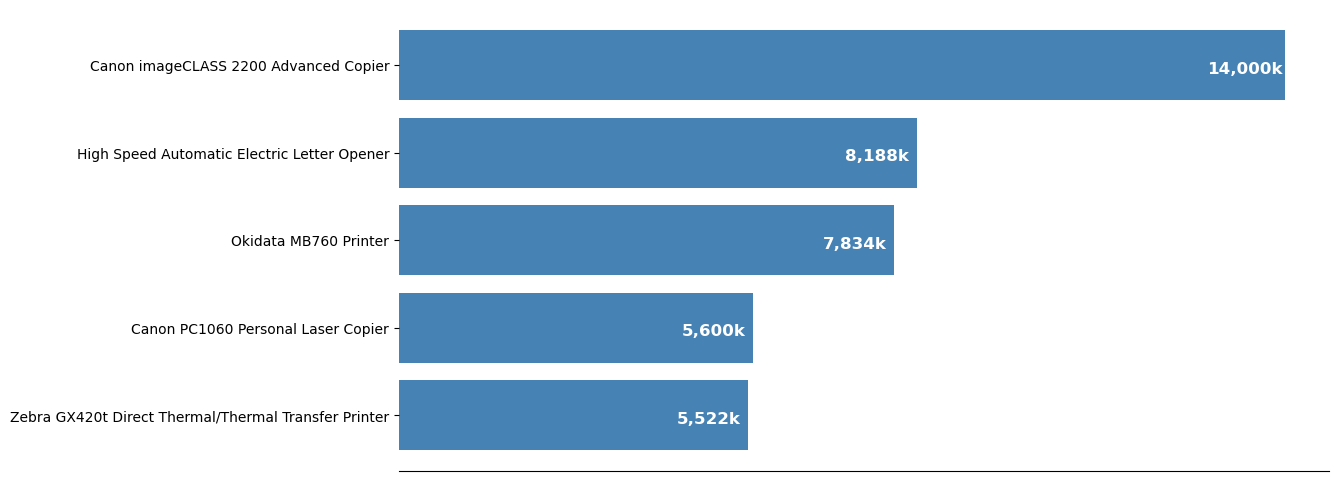

In [362]:
x = itens['Ano'].index
y = itens['Sales'].values



fig, ax = plt.subplots(figsize = (12,6))

ax.barh(x, y,color='steelblue',align='center')
# ax.tick_params('x',labelrotation = 90)
# ax.set_ylabel('Média de lucro por pedido')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.yaxis.set_visible(False)
# ax.set_ylim(0,38)
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x
# # ax.set_title('Quantidade comprada')
ax.invert_yaxis()
ax.xaxis.set_visible(False)


hgt = 0.2

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.0f}k'.format(itens['Sales'].values[i]), 
                (itens['Sales'].values[i]-300,x[i]),
                 ha="center",
                 va="top", xytext=(-15,3), textcoords="offset points", 
                 fontsize=12, fontweight='bold', color="white")

#     print(itens['Sales'].values[i],i)
    



plt.show()

In [341]:
# Vendas de cada produto por ano

tabela = base[['Product Name','Ano','Sales']].sort_values('Sales',ascending=False)

In [342]:
tabela = tabela.groupby(['Product Name','Ano'])['Sales'].sum().reset_index()
tabela = tabela.sort_values('Sales',ascending=False)

In [343]:
tabela2 = tabela.head(15)

In [344]:
tabela3 = tabela2.pivot(index = 'Product Name', columns = 'Ano').reset_index()

In [345]:
tabela3.columns =['Product Name','2011','2012','2013','2014']

In [363]:
tabela3

,Product Name,2011,2012,2013,2014
0,Apple iPhone 5,NaN,NaN,5198.64,NaN
1,Canon PC1060 Personal Laser Copier,NaN,NaN,5599.92,NaN
2,Canon imageCLASS 2200 Advanced Copier,NaN,NaN,NaN,13999.96
3,Cubify CubeX 3D Printer Double Head Print,NaN,NaN,NaN,4799.98
4,Fellowes PB300 Plastic Comb Binding Machine,NaN,NaN,NaN,3724.71
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,NaN,NaN,NaN,5083.96
6,Global Troy Executive Leather Low-Back Tilter,NaN,NaN,4809.42,NaN
7,Hewlett Packard LaserJet 3310 Copier,NaN,NaN,NaN,5279.91
8,High Speed Automatic Electric Letter Opener,8187.65,NaN,4912.59,NaN
9,Ibico EPK-21 Electric Binding System,NaN,NaN,4535.98,NaN
